<a href="https://colab.research.google.com/github/RedaPengam/Boavizta-Tools/blob/main/Recherche_Rapide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Auteur : Réda Pengam

# **📌 Introduction**

---

L'objectif de ce notebook est de pouvoir rechercher rapidement dans la base de données open source Boavizta. L'**empreinte carbone** du matériel correspond à la **colonne "gwp_total"**.

# **🔎 Recherche rapide**

---



Instructions pour faire une recherche rapide : 
>1 - Exécuter la cellule de code ci-dessous 👉 bouton play en haut à gauche lors du survol de la cellule de code
<br/>2 - Cliquer sur 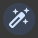 dans la cellule des résultats post exécution 👉 en haut à droite (ou bas gauche) de la cellule des résultats
<br/>3 - Cliquer sur le bouton "filter" dans la cellule des résultats 👉 le bouton apparaitra en haut à droite de la cellule après l'exécution de la ligne précédente

In [ ]:
from sys import dont_write_bytecode
import pandas as pd
import requests
import io

url_boavizta = "https://raw.githubusercontent.com/Boavizta/environmental-footprint-data/main/boavizta-data-us.csv"
# téléchargement des data raw
download = requests.get(url_boavizta).content
# filtrage des colonnes inutiles
listCol_boavizta = ["manufacturer","name","category","subcategory","gwp_total","gwp_use_ratio","yearly_tec","lifetime","use_location","report_date","sources","gwp_error_ratio","gwp_manufacturing_ratio","weight","assembly_location","screen_size","server_type","hard_drive","memory","number_cpu","height","added_date","add_method","gwp_transport_ratio","gwp_eol_ratio"]
listCol_boavizta_crop = ["manufacturer", "name", "subcategory", "hard_drive", "lifetime", "gwp_total"] 
df = pd.read_csv(io.StringIO(download.decode('utf-8')), usecols = listCol_boavizta_crop)
df

,manufacturer,name,subcategory,gwp_total,lifetime,hard_drive
0,Apple,13-inch MacBook Air (M1 CPU) 256GB - 2020,Laptop,161.000,3.0,SSD 256GB
1,Apple,13-inch MacBook Air (M1 CPU) 512GB - 2020,Laptop,181.000,3.0,SSD 512GB
2,Apple,13-inch MacBook Air with Retina display (1.1GH...,Laptop,174.000,3.0,SSD 256GB
3,Apple,13-inch MacBook Air with Retina display (1.1GH...,Laptop,202.000,3.0,SSD 512GB
4,Apple,13-inch MacBook Pro (Four Thunderbolt 3 ports)...,Laptop,298.000,3.0,SSD 1024GB
...,...,...,...,...,...,...
1587,Seagate,Nytro 1551 XA1920ME10083 1.92 TB,Hard drive,53.760,5.0,1.92TB SSD
1588,Seagate,Nytro 3331 XS7680SE70004 7.68TB,Hard drive,195.072,5.0,7.68TB SSD
1589,Seagate,OneStor SP2584 Extensible Storage Platform,SAN/NAS,190000.000,10.0,NaN
1590,Seagate,Pulsar 2 800GB SSD,Hard drive,205.000,3.0,800GB SSD
